In [4]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

In [105]:
data = pd.read_csv('output/results_ensemble.csv', 
                   names = ['N', 'n_train', 'n_swap', 'd', 'balanced', 
                            'test_size', 'dev', 'accuracy', 'brier', 'seed'])
data['B'] = 2**data.d
#data = data[data.seed==565]
data

,N,n_train,n_swap,d,balanced,test_size,dev,accuracy,brier,seed,B
0,200,2,1,1,True,0.2,0.05,1.000,0.084821,565,2
1,200,4,1,2,True,0.2,0.05,1.000,0.081801,565,4
2,200,8,1,3,True,0.2,0.05,1.000,0.082727,565,8
3,200,2,1,1,True,0.2,0.10,1.000,0.096779,565,2
4,200,4,1,2,True,0.2,0.10,1.000,0.094097,565,4
5,200,8,1,3,True,0.2,0.10,1.000,0.095769,565,8
6,200,2,1,1,True,0.2,0.15,0.975,0.115435,565,2
7,200,4,1,2,True,0.2,0.15,0.900,0.119569,565,4
8,200,8,1,3,True,0.2,0.15,1.000,0.112957,565,8
9,200,2,1,1,True,0.2,0.20,0.925,0.146704,565,2


In [76]:
d = data.d.unique()
B = data.B.unique()
std = [.05,.1, 15,.2, .25, .30]

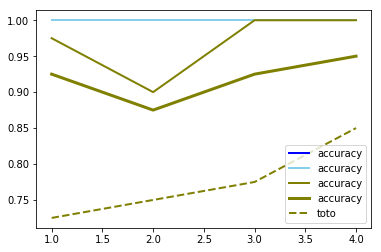

In [75]:
plt.plot(data.loc[data.dev==.05, 'd'], data.loc[data.dev==.05, 'accuracy'], color='blue',  linewidth=2)
plt.plot(data.loc[data.dev==.1, 'd'], data.loc[data.dev==.1, 'accuracy'], color='skyblue',  linewidth=2)
plt.plot(data.loc[data.dev==.15, 'd'], data.loc[data.dev==.15, 'accuracy'], color='olive', linewidth=2)
plt.plot(data.loc[data.dev==.2, 'd'], data.loc[data.dev==.2, 'accuracy'], color='olive', linewidth=3)
plt.plot(data.loc[data.dev==.25, 'd'], data.loc[data.dev==.25, 'accuracy'], color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()

In [102]:
import seaborn as sns

def plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='ensemble_performance.png'):
    
    # stds = np.array([0.10, .15, 0.20, .25, 0.30])
    colors = sns.diverging_palette(220, 10, n=5)

    fig, ax = plt.subplots(1)
    for i in np.arange(len(stds)):
        std= stds[i]
        color = colors[i]
        y = data.loc[data.dev==std, y_name]
        x = data.loc[data.dev==std, 'd']
        #plt.plot(x, y, color='blue',  linewidth=2)
        ax.plot(x,y, lw=2, label = std, color=color)
        # ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
        # mean = ((1+ro[1]*(T-1))/T)*err
        # lower = mean - ((1+ro[0]*(T-1))/T)*err
        # upper = ((1 + ro[2] * (T - 1)) / T) * err - mean
        #ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
    ax.set_title('Quantum Bagging performance')
    ax.legend(loc='lower right', title = '$Std$')
    ax.set_xlabel('Number of control qubits ($d$)')
    ax.set_ylabel(y_name)
    ax.grid(alpha=0.3)
    ax.legend(bbox_to_anchor=(1.01, 1.05), title = '$Std$')
    plt.savefig('output/' + filename, dpi =300)
    plt.show()

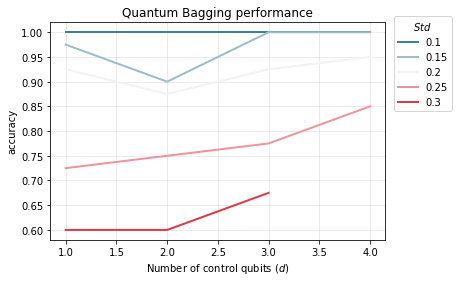

In [103]:
plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='acc_ensemble_performance.png')

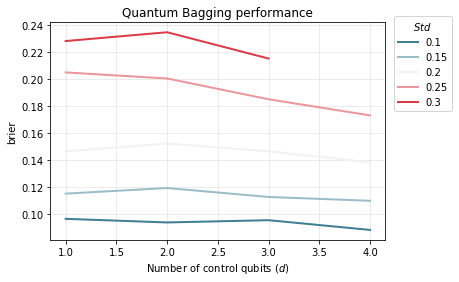

In [104]:
plot_ensemble_results(data, palette=[220,10], y_name='brier', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='brier_ensemble_performance.png')